In [1]:
import re
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Annotate variants using `snpEff`

    java -Xmx4g -jar snpEff.jar GRCh37.75 ../patient-data/Exome/variants.vcf \
        > ../results/exome-variants-snpeff-grch37.75.vcf
        

In [1]:
def get_del_len(x):
    gr = re.match('(DEL|INV)(?P<length>[0-9]+)', x,)
    if gr is not None:
        return int(gr.groupdict()['length'])
    else:
        return 1
    
map_Annotation_Impact = {vv:kk for kk,vv in enumerate(
    ['LOW', 'MODERATE', 'MODIFIER', 'HIGH',])}

In [155]:
# %%bash
# # sed 's/^/chr/'
# # !grep -v '##' results/exome-variants-snpeff-grch37.75.vcf | head
# cat results/exome-variants-snpeff-grch37.75.vcf | sed 's/^/chr/' | sed 's/^chr#/#/' \
#     >  results/exome-variants-snpeff-grch37.75-chr.vcf 

In [2]:
# %%bash
# # -a refs/gencode.v29lift37.annotation.geneid.bed \
# #     -a refs/gencode.v29lift37.annotation.gff3.gz \
# cat refs/gencode.v29lift37.annotation.bed | grep '[^chr|^#chr]' |
# bedtools intersect \
#     -a  - \
#     -b results/exome-variants-snpeff-grch37.75-chr.vcf \
#     -wo  -header \
#     > results/exome-variants-snpeff-grch37.75-gencode.bed

In [245]:
# results/SQ9887_L00.combined.genotyped-snpeff-grch37.75-annotations-pass-homozygous.vcf.gz
!head -n1 results/SQ9887_L00.combined.genotyped-snpeff-grch37.75-annotations.vcf> \
results/SQ9887_L00.combined.genotyped-snpeff-grch37.75-annotations-pass-homozygous.vcf

In [246]:
!zcat results/SQ9887_L00.combined.genotyped-snpeff-grch37.75-annotations-pass-homozygous.vcf.gz \
>> results/SQ9887_L00.combined.genotyped-snpeff-grch37.75-annotations-pass-homozygous.vcf

In [250]:
fns = {'cnv':
      'results/SQ9887_L00.combined.genotyped-snpeff-grch37.75-annotations-pass-homozygous.vcf',
      'exome':
       'results/exome-variants-snpeff-grch37.75-gencode-annotations-pass-homozygous.vcf'
      }

In [449]:
variants = []
for kk,fn in fns.items():
    tmp=pd.read_csv(fn, sep='\t')
    tmp['type'] = kk
    variants.append(tmp)
del tmp
variants = pd.concat(variants).reset_index(drop=True)

/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,9,13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [461]:
(variants.Gene_Name == 'MUC13').sum()

44

In [ ]:
(variants.Gene_Name == 'MUC13').sum()

In [451]:
variants['Annotation_Impact_Int'] = (variants.Annotation_Impact
                                     .map(lambda x: map_Annotation_Impact[x]))


In [463]:
variants.columns

Index(['#CHROM', 'AA.pos.length', 'ALT', 'Allele', 'Annotation',
       'Annotation_Impact', 'CDS.pos.length', 'Distance', 'ERRORS', 'FILTER',
       'FORMAT', 'Feature_ID', 'Feature_Type', 'Gene_ID', 'Gene_Name',
       'HGVS.c', 'HGVS.p', 'ID', 'POS', 'QUAL', 'REF', 'RESULT', 'Rank',
       'Transcript_BioType', 'cDNA.pos.length', 'type',
       'Annotation_Impact_Int', 'length', 'CDS.length'],
      dtype='object')

In [452]:
variants['length'] = variants['ID'].map(get_del_len)

In [453]:
mask = ~variants['CDS.pos.length'].isnull()
variants.loc[mask, 'CDS.length'] = variants.loc[mask, 'CDS.pos.length'].map(
        lambda x: pd.np.diff([int(y) for y in x.split('/')])[0])

In [464]:
variants.to_csv(
    sep='\t')

,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,CDS.pos.length,Distance,ERRORS,FILTER,...,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type,Annotation_Impact_Int,length,CDS.length
0,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,3007.0,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv,2,30,NaN
1,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,5203.0,WARNING_TRANSCRIPT_NO_START_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv,2,30,NaN
2,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,NaN,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/13,protein_coding,NaN,cnv,2,30,NaN
3,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/6,protein_coding,NaN,cnv,2,30,NaN
4,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/4,protein_coding,NaN,cnv,2,30,NaN


/tools/miniconda/envs/jupyter-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


(6, 89125.0938133746)

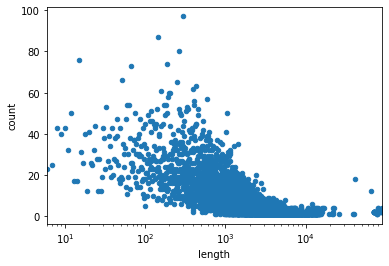

In [361]:
mask = ~variants['CDS.pos.length'].isnull()
cds_lengths = variants.loc[mask, 'CDS.length'].value_counts().sort_index().reset_index()
cds_lengths.columns = ['length', 'count']
#index	CDS.length
cds_lengths.plot(x='length', y='count', kind='scatter',)
plt.xscale('log')
plt.xlim([0,6])

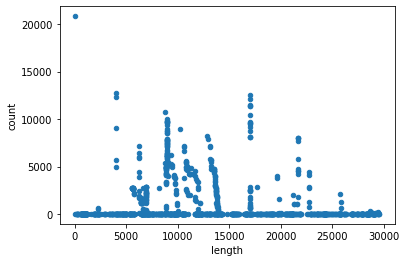

In [371]:
mask = (variants['length']>1)
del_lengths = variants.loc[mask, 'length'].value_counts().sort_index().reset_index()
del_lengths.columns = ['length', 'count']
#index	CDS.length
del_lengths.plot(x='length', y='count', kind='scatter',)
# plt.xscale('log')
# plt.xlim([0,4])

In [254]:
variants.Transcript_BioType.value_counts()

protein_coding                        805038
retained_intron                       212290
processed_transcript                  204347
nonsense_mediated_decay               122048
antisense                              74407
processed_pseudogene                   71742
lincRNA                                64483
unprocessed_pseudogene                 20430
miRNA                                  19872
misc_RNA                               13594
snRNA                                  13104
snoRNA                                  9282
transcribed_unprocessed_pseudogene      6484
sense_intronic                          3985
rRNA                                    2867
transcribed_processed_pseudogene        2404
pseudogene                              2129
sense_overlapping                       2029
unitary_pseudogene                      1507
polymorphic_pseudogene                  1130
prime3_overlapping_ncrna                 357
non_stop_decay                           219
TR_J_gene 

In [258]:
# variants.Annotation.value_counts()
variants.columns

Index(['#CHROM', 'AA.pos.length', 'ALT', 'Allele', 'Annotation',
       'Annotation_Impact', 'CDS.pos.length', 'Distance', 'ERRORS', 'FILTER',
       'FORMAT', 'Feature_ID', 'Feature_Type', 'Gene_ID', 'Gene_Name',
       'HGVS.c', 'HGVS.p', 'ID', 'POS', 'QUAL', 'REF', 'RESULT', 'Rank',
       'Transcript_BioType', 'cDNA.pos.length', 'type'],
      dtype='object')

In [255]:
variants.head()

,#CHROM,AA.pos.length,ALT,Allele,Annotation,Annotation_Impact,CDS.pos.length,Distance,ERRORS,FILTER,...,HGVS.p,ID,POS,QUAL,REF,RESULT,Rank,Transcript_BioType,cDNA.pos.length,type
0,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,3007.0,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,NaN,DEL0030SUR,869451,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv
1,chr1,NaN,<DEL>,<DEL>,upstream_gene_variant,MODIFIER,NaN,5203.0,WARNING_TRANSCRIPT_NO_START_CODON,PASS,...,NaN,DEL0030SUR,869451,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",NaN,protein_coding,NaN,cnv
2,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,NaN,PASS,...,NaN,DEL0030SUR,869451,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/13,protein_coding,NaN,cnv
3,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,NaN,DEL0030SUR,869451,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/6,protein_coding,NaN,cnv
4,chr1,NaN,<DEL>,<DEL>,intron_variant,MODIFIER,NaN,NaN,WARNING_TRANSCRIPT_NO_STOP_CODON,PASS,...,NaN,DEL0030SUR,869451,5.0,N,"1/1:BREAKDANCER,CNVNATOR,DELLY,LUMPY",4/4,protein_coding,NaN,cnv


    gf3 -> bed
    vcf + gf3 -> bedtools intersect

vcf

gf3 -- gene positions, human genes
 

## Append 'chr' to exome variants

In [11]:
# outfn = 'local-patient-data/Exome/variants.vcf'
# os.makedirs(os.path.dirname(outfn), exist_ok = True)

# with open(fn) as fh, open(outfn,'w+') as outfh:
#     for line in fh:
#         if line.startswith('#'):
#             print(line, end='', file=outfh)
#         else:
#             print('chr'+line, end='', file=outfh)

In [12]:
# !ls local-patient-data/Exome/variants.vcf